In [1]:
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras import layers
from keras import models
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),
                        activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [6]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True,)

In [7]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [8]:
original_dataset_dir = 'C:/Users/Welcome/Dogs Emotion Recognition/Dogs_Emotion_Recognition_Dataset'
base_dir = 'C:/Users/Welcome/Dogs Emotion Recognition/Dogs_Emotion_Recognition_Dataset'
# os.mkdir(base_dir)

In [10]:
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 1200 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [12]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

data batch shape:  (32, 150, 150, 3)
labels batch shape:  (32, 4)


In [13]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)
model.save('modelcool30.h5')

<ipython-input-13-07dfe74bc965>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 169s 2s/step - loss: 1.3800 - acc: 0.2708 - val_loss: 1.4475 - val_acc: 0.2475


In [15]:
history = model.fit(validation_generator, validation_data=validation_generator, batch_size=32, epochs=30)
# model.fit(
    #validation_generator, train_generator,
    #epochs=30,
    #validation_data=(validation_generator, validation_generator)
#)

Epoch 1/30
13/13 [==============================] - 28s 2s/step - loss: 0.7538 - acc: 0.6850 - val_loss: 0.6142 - val_acc: 0.8050
Epoch 2/30
13/13 [==============================] - 26s 2s/step - loss: 0.6988 - acc: 0.7425 - val_loss: 0.5839 - val_acc: 0.8175
Epoch 3/30
13/13 [==============================] - 27s 2s/step - loss: 0.6856 - acc: 0.7375 - val_loss: 0.5938 - val_acc: 0.8075
Epoch 4/30
13/13 [==============================] - 26s 2s/step - loss: 0.6577 - acc: 0.7375 - val_loss: 0.5814 - val_acc: 0.7950
Epoch 5/30
13/13 [==============================] - 27s 2s/step - loss: 0.6791 - acc: 0.7425 - val_loss: 0.5399 - val_acc: 0.8475
Epoch 6/30
13/13 [==============================] - 27s 2s/step - loss: 0.5909 - acc: 0.8150 - val_loss: 0.6409 - val_acc: 0.7375
Epoch 7/30
13/13 [==============================] - 26s 2s/step - loss: 0.6421 - acc: 0.7400 - val_loss: 0.4876 - val_acc: 0.8625
Epoch 8/30
13/13 [==============================] - 27s 2s/step - loss: 0.5774 - acc: 0.80

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [24]:
epochs = range(1, len(acc) + 1)

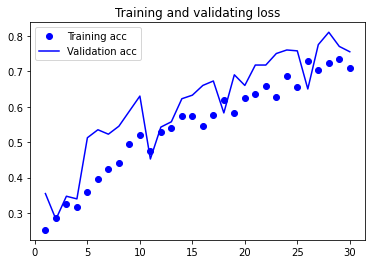

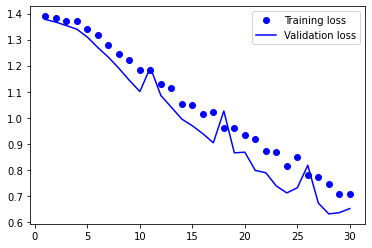

In [25]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validating loss')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

plt.show()